In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing 
import time
import h5py
import time

In [2]:
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"f3c97208f4981e63b57bb02c7135912b"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [3]:
r = get(baseUrl)

In [4]:
tstart = time.time()

url_z0 = "http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/?limit=10000&offset=0"
subhalos_z0 = get(url_z0)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

Elapsed Time: 3.24s


In [5]:
sub_z0 = [] ## array that contains subhalo information 
tstart = time.time()

len_sub = 10000

for i in range(len_sub):
    sub_z0.append(get(subhalos_z0['results'][i]['url']))
    print(i)

#print(sub_z0)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
pd.set_option('display.max_columns', None)
data_z0 = pd.DataFrame(sub_z0)
data_z0 = data_z0.drop(['id','snap','bhmdot','cm_x', 'cm_y','cm_z','pos_x','pos_y','pos_z','sfrinhalfrad','sfrinmaxrad', 'sfrinrad',
                  'spin_x','spin_y', 'spin_z', 'prog_snap', 'windmass', 'prog_snap', 'prog_sfid', 'desc_snap','desc_sfid','parent','grnr','primary_flag', 
                 'related','cutouts','trees','supplementary_data','vis','meta', 'massinhalfrad','massinhalfrad_gas','massinhalfrad_dm','massinhalfrad_stars',
                'massinhalfrad_bhs','massinmaxrad','massinmaxrad_gas','massinmaxrad_dm','massinmaxrad_stars','massinmaxrad_bhs','massinrad','gasmetallicitysfr',
                'gasmetallicitysfrweighted','gasmetallicityhalfrad','gasmetallicitymaxrad','massinrad_gas','massinrad_dm','massinrad_stars','massinrad_bhs',
                'starmetallicityhalfrad','starmetallicitymaxrad', 'stellarphotometricsrad', 'vel_x','vel_y','vel_z'],axis = 1)
data_z0

,gasmetallicity,halfmassrad,halfmassrad_gas,halfmassrad_dm,halfmassrad_stars,halfmassrad_bhs,len,len_gas,len_dm,len_stars,len_bhs,mass,mass_gas,mass_dm,mass_stars,mass_bhs,sfr,starmetallicity,stellarphotometrics_u,stellarphotometrics_b,stellarphotometrics_v,stellarphotometrics_k,stellarphotometrics_g,stellarphotometrics_r,stellarphotometrics_i,stellarphotometrics_z,stellarphotometricsmassinrad,veldisp,vmax,vmaxrad,mass_log_msun
0,0.007718,607.9660,627.3110,610.3100,47.3881,0.0,88772413,38648183,46136876,3987343,11,27477.900000,3900.60000,23325.600000,251.01600,0.701811,2.227190,0.028622,-24.1033,-24.5116,-25.3760,-28.3093,-24.9662,-25.7158,-26.0726,-26.3286,139.71200,603.8750,999.3850,327.8280,14.608138
1,0.008247,300.9590,368.5260,291.9040,17.0124,0.0,11346853,4454136,6297959,594757,1,3666.620000,444.55900,3184.090000,37.85260,0.125566,0.413285,0.021265,-22.1142,-22.4991,-23.3480,-26.2491,-22.9476,-23.6833,-24.0339,-24.2839,21.47510,333.8930,514.7760,376.2010,13.733421
2,0.011213,78.2494,49.6454,82.6389,14.9840,0.0,2202646,114637,1420531,667477,1,773.456000,12.61160,718.184000,42.48240,0.177487,17.392200,0.025407,-23.0678,-23.1291,-23.7847,-26.5456,-23.4980,-24.0692,-24.3691,-24.5975,27.32500,297.5770,461.6410,70.9815,13.057590
3,0.020788,108.9710,116.4190,113.2260,6.5303,0.0,959548,165791,614172,179584,1,339.133000,16.96820,310.510000,11.62090,0.034418,5.079380,0.023964,-21.9708,-22.0503,-22.6820,-25.3858,-22.4122,-22.9552,-23.2390,-23.4537,9.19744,159.5620,291.9370,2.3082,12.699525
4,0.013132,85.2062,57.3282,89.2432,8.9908,0.0,836490,86902,606919,142668,1,325.367000,9.43925,306.843000,9.03248,0.052341,1.414690,0.020044,-20.9494,-21.1460,-21.8835,-24.6734,-21.5482,-22.1905,-22.5117,-22.7445,5.13334,168.7440,294.4330,42.0984,12.681528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,2.7849,0.0000,2.7849,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.5589,14.9006,1.3714,8.526155
9996,0.000000,3.6871,0.0000,3.6871,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.5993,11.9622,2.1279,8.526155
9997,0.000000,2.6063,0.0000,2.6063,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.4710,13.7990,2.6271,8.526155
9998,0.000000,2.9047,0.0000,2.9047,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.9389,13.8123,3.6481,8.526155


In [7]:
Mlog = data_z0['mass_log_msun'] ## log of total mass in solar units
Mtot = data_z0['mass'] ## total mass solar units

## all in units of magnitude
V = data_z0['stellarphotometrics_v']
G = data_z0['stellarphotometrics_g']
U = data_z0['stellarphotometrics_u']
I = data_z0['stellarphotometrics_i']
B = data_z0['stellarphotometrics_b']
R = data_z0['stellarphotometrics_r']
Z = data_z0['stellarphotometrics_z']

vel = data_z0['vmax'] ## km/s
vel = np.log10(vel)

In [8]:
ug = U-G
gr = G - R
ri = R - I
iz = I - Z

Text(0, 0.5, '$Mass (log Msun$')

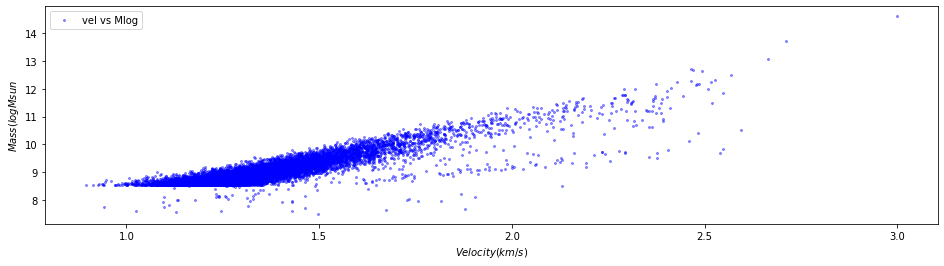

In [9]:
fig, (ax4) = plt.subplots(ncols=1, figsize=(16, 4))

ax4.plot(vel, Mlog, '.', ms=4, c='b', label='vel vs Mlog', alpha=0.4)
ax4.legend(loc=2)
ax4.set_xlabel('$Velocity (km/s)$')
ax4.set_ylabel('$Mass (log Msun$')

Text(0.5, 0, '$Velocity (km/s)$')

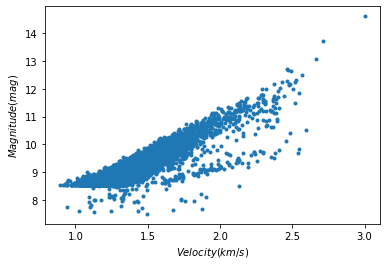

In [10]:
fig, (ax0) = plt.subplots(ncols=1)

ax0.plot(vel, Mlog, '.')
ax0.set_ylabel('$Magnitude (mag)$')
ax0.set_xlabel('$Velocity (km/s)$')

In [11]:
sfr_bool = []

## using for loop to iterate over data and calculate if SFR or not
for i in range(10000):
    if (data_z0['sfr'][i]) > 0:
        sfr_bool += [1]
    else:
        sfr_bool += [0]

In [12]:
## drop the sfr so test data doesn't have this info
data_z0 = data_z0.drop('sfr',1)
data_z0

,gasmetallicity,halfmassrad,halfmassrad_gas,halfmassrad_dm,halfmassrad_stars,halfmassrad_bhs,len,len_gas,len_dm,len_stars,len_bhs,mass,mass_gas,mass_dm,mass_stars,mass_bhs,starmetallicity,stellarphotometrics_u,stellarphotometrics_b,stellarphotometrics_v,stellarphotometrics_k,stellarphotometrics_g,stellarphotometrics_r,stellarphotometrics_i,stellarphotometrics_z,stellarphotometricsmassinrad,veldisp,vmax,vmaxrad,mass_log_msun
0,0.007718,607.9660,627.3110,610.3100,47.3881,0.0,88772413,38648183,46136876,3987343,11,27477.900000,3900.60000,23325.600000,251.01600,0.701811,0.028622,-24.1033,-24.5116,-25.3760,-28.3093,-24.9662,-25.7158,-26.0726,-26.3286,139.71200,603.8750,999.3850,327.8280,14.608138
1,0.008247,300.9590,368.5260,291.9040,17.0124,0.0,11346853,4454136,6297959,594757,1,3666.620000,444.55900,3184.090000,37.85260,0.125566,0.021265,-22.1142,-22.4991,-23.3480,-26.2491,-22.9476,-23.6833,-24.0339,-24.2839,21.47510,333.8930,514.7760,376.2010,13.733421
2,0.011213,78.2494,49.6454,82.6389,14.9840,0.0,2202646,114637,1420531,667477,1,773.456000,12.61160,718.184000,42.48240,0.177487,0.025407,-23.0678,-23.1291,-23.7847,-26.5456,-23.4980,-24.0692,-24.3691,-24.5975,27.32500,297.5770,461.6410,70.9815,13.057590
3,0.020788,108.9710,116.4190,113.2260,6.5303,0.0,959548,165791,614172,179584,1,339.133000,16.96820,310.510000,11.62090,0.034418,0.023964,-21.9708,-22.0503,-22.6820,-25.3858,-22.4122,-22.9552,-23.2390,-23.4537,9.19744,159.5620,291.9370,2.3082,12.699525
4,0.013132,85.2062,57.3282,89.2432,8.9908,0.0,836490,86902,606919,142668,1,325.367000,9.43925,306.843000,9.03248,0.052341,0.020044,-20.9494,-21.1460,-21.8835,-24.6734,-21.5482,-22.1905,-22.5117,-22.7445,5.13334,168.7440,294.4330,42.0984,12.681528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,2.7849,0.0000,2.7849,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.5589,14.9006,1.3714,8.526155
9996,0.000000,3.6871,0.0000,3.6871,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.5993,11.9622,2.1279,8.526155
9997,0.000000,2.6063,0.0000,2.6063,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.4710,13.7990,2.6271,8.526155
9998,0.000000,2.9047,0.0000,2.9047,0.0000,0.0,45,0,45,0,0,0.022751,0.00000,0.022751,0.00000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,6.9389,13.8123,3.6481,8.526155


In [13]:
from sklearn.model_selection import train_test_split

X = data_z0
y = sfr_bool

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
import time

tstart = time.time()

model = RandomForestClassifier(n_estimators=100, oob_score=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.oob_score_)
print("Elapsed Time: {:.2f}s".format(time.time() - tstart))

0.9984
0.9989333333333333
Elapsed Time: 0.46s


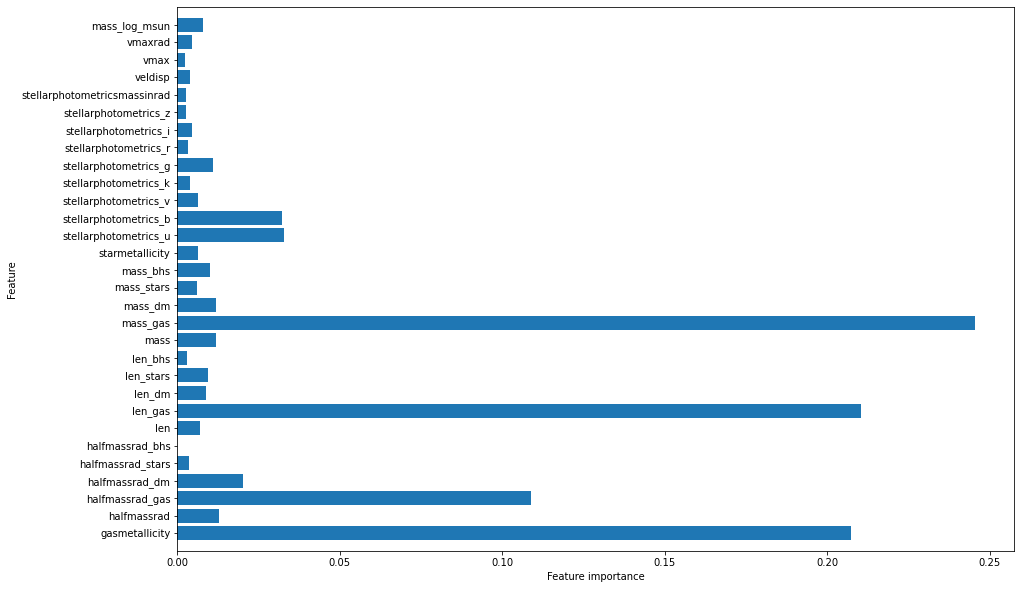

In [15]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

## feature importance plot
def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (data_z0.head()))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.gcf().set_size_inches(15, 10)
    
plot_feature_importances(model)